In [ ]:
# Install a pip comtradeapicall package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install --upgrade comtradeapicall

In [ ]:
# Install a pip pandas package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install pandas

In [ ]:
# Install a pip matplotlib package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib

In [ ]:
# Install a pip scipy package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install scipy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import comtradeapicall

In [3]:
# use .env to store the subscription key
from dotenv import load_dotenv
import os

load_dotenv()
# comtrade api subscription key (from comtradedeveloper.un.org)
subscription_key = os.getenv("SUBSCRIPTION_KEY")
directory = '<OUTPUT DIR>'  # output directory for downloaded files

In [4]:
# Call get tariffline data API to a data frame, max to 250K records, free/premium subscription key required
# This example: imports of the assigned commodity_code (below) so that we can calculate the global unit value ($/kg)

In [5]:
Commodity_code = '3006'  # pharmaceutical goods
Commodity_code = '1006'  # rice
Commodity_code = '9201'  # piano
Commodity_code = '2709'  # crude oil
Commodity_code = '0901'  # coffee
Commodity_code = '6309'  # secondhand/ worn clothing
Commodity_code = '1001'  # wheat and meslin
Commodity_code = '7108'  # non-monetary gold

In [ ]:
from datetime import datetime
# create an Empty DataFrame object
panDForig = pd.DataFrame()
# A list of periods (this is for monthly sets), this is to optimize the API calls and avoid timeout
current_year = datetime.now().year
period_start = f"{current_year - 1}-01-01"
period_end = f"{current_year}-12-01"
periods = pd.date_range(period_start, period_end,
                        freq='MS').strftime("%Y%m").tolist()

In [10]:
# convert periods list into string with comma delimiter
delim = ","
temp = list(map(str, periods))
period_string = delim.join(temp)
print(period_string)

202401,202402,202403,202404,202405,202406,202407,202408,202409,202410,202411,202412,202501,202502,202503,202504,202505,202506,202507,202508,202509,202510,202511,202512


In [11]:
# get all tariffline data for a specific commodity_code
# this is a long operation and it is better to use comtradeapicall._getTarifflineData instead of comtradeapicall.getTarifflineData
# the function will split the query into multiple API calls reducing risk of timeout and increasing response time
panDForig = comtradeapicall._getTarifflineData(subscription_key, typeCode='C', freqCode='M', clCode='HS',
                                               period=period_string,
                                               reporterCode=None, cmdCode=Commodity_code, flowCode='M',
                                               partnerCode=None, partner2Code=None, customsCode=None, motCode=None, maxRecords=None,
                                               format_output='JSON',
                                               countOnly=None, includeDesc=True)

In [12]:
# check number of records
print('Final row count is:', len(panDForig))

Final row count is: 29209


In [13]:
# convert period to string for better viz
panDForig['period'] = panDForig['period'].astype('string')
panDForig['motCode'] = panDForig['motCode'].astype('string')
print(panDForig.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29209 entries, 0 to 301
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   typeCode            29209 non-null  object 
 1   freqCode            29209 non-null  object 
 2   refPeriodId         29209 non-null  int64  
 3   period              29209 non-null  string 
 4   reporterCode        29209 non-null  int64  
 5   reporterDesc        29209 non-null  object 
 6   reporterISO         29209 non-null  object 
 7   flowCode            29209 non-null  object 
 8   flowDesc            29209 non-null  object 
 9   partnerCode         29209 non-null  int64  
 10  partnerDesc         29209 non-null  object 
 11  partnerISO          29209 non-null  object 
 12  partner2Code        29209 non-null  int64  
 13  partner2Desc        29209 non-null  object 
 14  partner2ISO         29209 non-null  object 
 15  classificationCode  29209 non-null  object 
 16  cmdCode    

In [14]:
# show some records
panDForig.head()

,typeCode,freqCode,refPeriodId,period,reporterCode,reporterDesc,reporterISO,flowCode,flowDesc,partnerCode,...,qtyUnitAbbr,qty,altQtyUnitCode,altQtyUnitAbbr,altQty,netWgt,grossWgt,cifvalue,fobvalue,primaryValue
0,C,M,20240101,202401,36,Australia,AUS,M,Import,757,...,N/A,0.0,-1,N/A,0.0,0.0,0.14316,7.889540e+06,7.883390e+06,7.889540e+06
1,C,M,20240101,202401,36,Australia,AUS,M,Import,554,...,N/A,0.0,-1,N/A,0.0,0.0,0.72128,1.083331e+07,1.082024e+07,1.083331e+07
2,C,M,20240101,202401,36,Australia,AUS,M,Import,554,...,N/A,0.0,-1,N/A,0.0,0.0,0.02710,1.776996e+06,1.772274e+06,1.776996e+06
3,C,M,20240101,202401,36,Australia,AUS,M,Import,554,...,N/A,0.0,-1,N/A,0.0,0.0,0.36200,2.124240e+07,2.118831e+07,2.124240e+07
4,C,M,20240101,202401,36,Australia,AUS,M,Import,554,...,N/A,0.0,-1,N/A,0.0,0.0,0.12071,8.605947e+05,8.581869e+05,8.605947e+05


In [15]:
# some descriptive stats
panDForig[['primaryValue', 'netWgt']].describe()

,primaryValue,netWgt
count,2.920900e+04,2.920900e+04
mean,2.525140e+07,4.608382e+02
std,1.764482e+08,7.496448e+03
min,0.000000e+00,0.000000e+00
25%,3.605285e+03,6.000000e-02
50%,8.371179e+04,2.000000e+00
75%,1.523644e+06,2.200000e+01
max,7.935672e+09,1.179360e+06


In [16]:
# add new column UVnetWgt = primaryValue/netWgt
panDForig['UVnetWgt'] = panDForig.primaryValue / panDForig.netWgt

In [17]:
# remove UVnetWgt NaN,zero, inf, but and keeping only mode of transport and period
panDF = panDForig[["motDesc", "period", "UVnetWgt"]]
panDF = panDF[panDF.notnull()].query('UVnetWgt>0')
panDF = panDF[panDF.notnull()].query('UVnetWgt<999999999999999')
panDF.describe()

,UVnetWgt
count,2.468500e+04
mean,8.828735e+04
std,1.738855e+06
min,7.057738e-03
25%,3.129397e+04
50%,6.459375e+04
75%,8.437917e+04
max,2.534770e+08


Text(0.5, 1.0, 'Unit Value Distribution')

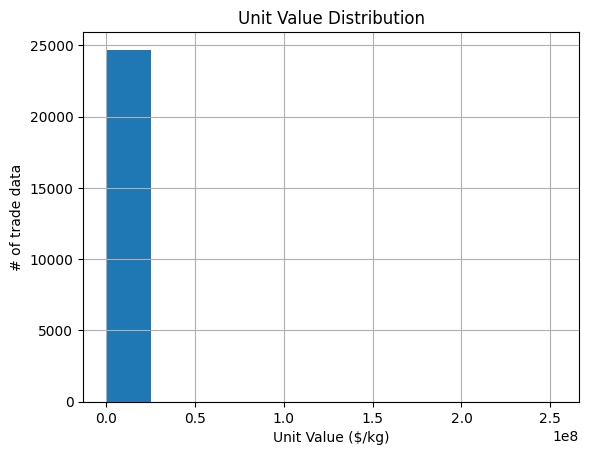

In [18]:
# plot the Unit Value histogram
panDF.hist("UVnetWgt")
plt.xlabel('Unit Value ($/kg)')
plt.ylabel('# of trade data')
plt.title('Unit Value Distribution')

Text(0.5, 1.0, 'Unit Value Distribution')

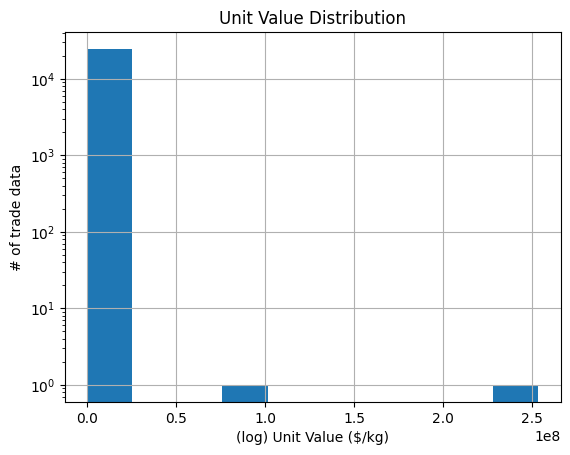

In [19]:
# plot the Unit Value histogram - in log scale (more suited for trade data with long distribution tail)
panDF.hist("UVnetWgt", log=True)
plt.xlabel('(log) Unit Value ($/kg)')
plt.ylabel('# of trade data')
plt.title('Unit Value Distribution')

In [20]:
# add log UVnetWgtLog
panDF.loc[:, 'UVnetWgtLog'] = np.log(panDF['UVnetWgt'])
panDF.describe()

,UVnetWgt,UVnetWgtLog
count,2.468500e+04,24685.000000
mean,8.828735e+04,10.350586
std,1.738855e+06,1.902674
min,7.057738e-03,-4.953631
25%,3.129397e+04,10.351181
50%,6.459375e+04,11.075873
75%,8.437917e+04,11.343076
max,2.534770e+08,19.350784


In [21]:
# remove outliers based on zcores (if more than 3 standard deviation) on the log Unit Value
from scipy.stats import zscore
# calculate z-scores of `df`
z_scores = zscore(panDF['UVnetWgtLog'], axis=0)
# print(z_scores)
abs_z_scores = np.abs(z_scores)
# print(abs_z_scores)
filtered_entries = (abs_z_scores < 3)
# print(filtered_entries)
new_panDF = panDF[filtered_entries]

In [22]:
# descriptive statistics after outliers removal
new_panDF.describe()

,UVnetWgt,UVnetWgtLog
count,2.401900e+04,24019.000000
mean,7.495369e+04,10.547223
std,2.318156e+05,1.479310
min,1.042112e+02,4.646419
25%,3.581786e+04,10.486202
50%,6.529306e+04,11.086641
75%,8.481987e+04,11.348285
max,8.546000e+06,15.960974


array([[<Axes: title={'center': 'UVnetWgt'}>,
        <Axes: title={'center': 'UVnetWgtLog'}>]], dtype=object)

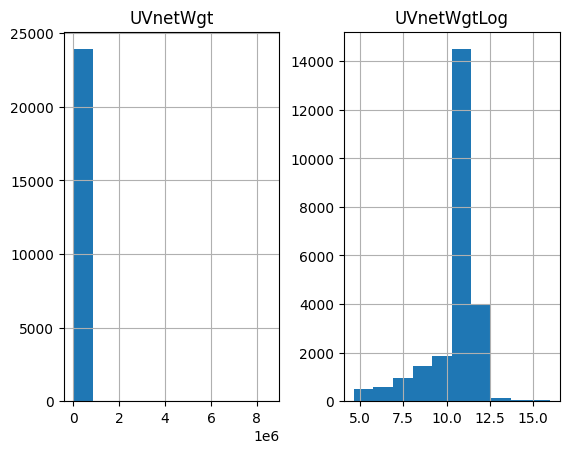

In [23]:
# histogram statistics after outliers removal
new_panDF.hist(column=['UVnetWgt', 'UVnetWgtLog'])

<Axes: xlabel='period'>

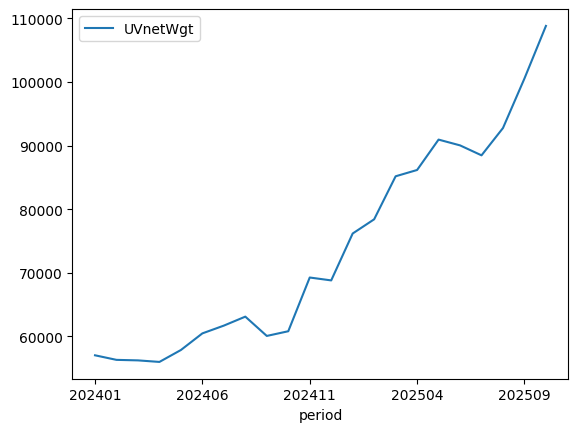

In [24]:
# plot median in timeseries after outliers removal
new_panDF[['period', 'UVnetWgt']].groupby("period").median().plot()

<Axes: xlabel='motDesc'>

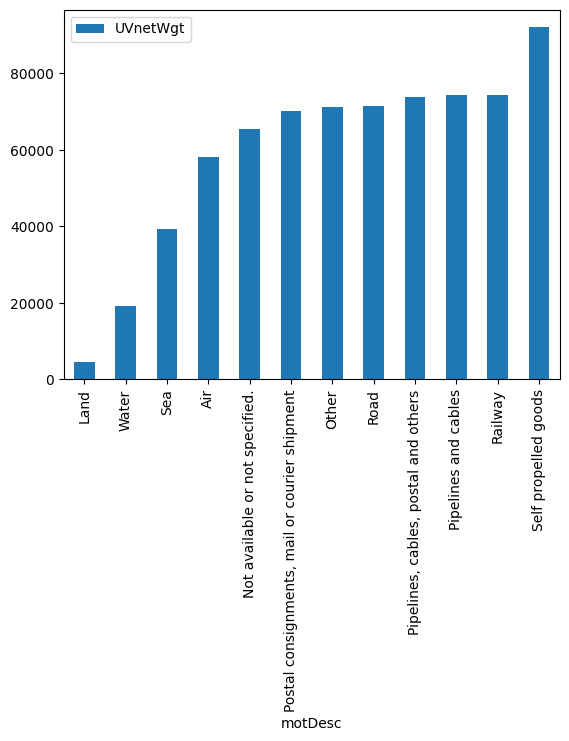

In [25]:
# plot median by mode of transport after outliers removal
new_panDF[['motDesc', 'UVnetWgt']].groupby("motDesc").median(
).sort_values(by='UVnetWgt').plot.bar(y='UVnetWgt', rot=90)

In [26]:
# some extra analysis  - descriptive statstiscs by period
new_panDF[['period', 'UVnetWgt']].groupby("period").describe()

UVnetWgt                                                          \
          count           mean            std         min           25%   
period                                                                    
202401   1263.0   72800.569264  325593.110974  110.602726  31494.066231   
202402   1401.0   86373.295072  466210.763568  104.211185  30377.297200   
202403   1392.0   64425.715658  182567.081406  106.226939  30781.024105   
202404   1378.0   64785.718130  233582.188642  105.588945  32250.926137   
202405   1311.0   74223.541594  304537.251662  115.111938  34280.603506   
202406   1202.0   58707.595583  137521.722325  110.008506  31392.773617   
202407   1297.0   60155.546443   97306.961507  105.489425  37833.233643   
202408   1237.0   59496.063427   61937.269443  110.841845  31493.749633   
202409   1350.0   62598.774206  153240.728845  104.402847  37846.602688   
202410   1445.0   61791.639642   70807.616512  110.933565  39162.898496   
202411   1235.0   73433.907732  249529.504180  104.613111  34674.075258   
202412   1210.0   70127.510470  192145.260688  107.532491  30829.936245   
202501    963.0   96089.680153  333648.970729  106.138600  44743.689304   
202502    983.0   76928.492406  145710.596664  114.862891  42893.784858   
202503    969.0   82441.514118  198336.619028  111.767622  46433.410000   
202504    947.0   82835.798645  153416.809834  109.097649  43648.355085   
202505    967.0  100496.373875  272887.177969  106.126428  41696.058676   
202506    935.0   91568.793988  268711.829010  109.231066  45565.646360   
202507    891.0   90203.687803  214546.400906  104.895660  40032.022172   
202508    711.0   82085.230692   68948.108653  107.590714  45011.965926   
202509    667.0   93702.410345  124111.017175  104.824118  55834.604997   
202510    265.0  109622.803059  296092.926971  115.553343  38502.709988   

                                                    
                  50%            75%           max  
period                                              
202401   57040.537588   65831.588667  6.647000e+06  
202402   56323.008796   65447.164776  8.546000e+06  
202403   56241.225358   68424.058145  3.140000e+06  
202404   55999.251386   73867.211783  6.853000e+06  
202405   57872.446088   75342.096893  8.309000e+06  
202406   60486.291075   74884.231951  4.500490e+06  
202407   61707.192096   76465.333333  2.175000e+06  
202408   63118.487512   79071.000000  1.061500e+06  
202409   60084.848250   81241.899358  4.791196e+06  
202410   60822.028840   84869.131579  2.005333e+06  
202411   69269.253962   85629.405783  7.584000e+06  
202412   68814.046795   85000.000000  5.183838e+06  
202501   76187.552264   86764.038084  7.233000e+06  
202502   78419.585523   93036.971185  3.244000e+06  
202503   85181.980000   95897.000000  5.102930e+06  
202504   86172.711886  102426.383728  3.266000e+06  
202505   90949.423618  106451.619709  4.566000e+06  
202506   90041.972973  108154.127434  6.806020e+06  
202507   88476.341571  107755.364617  4.046000e+06  
202508   92769.366656  108712.260873  9.643117e+05  
202509  100557.284600  116283.171156  2.361949e+06  
202510  108820.958784  127157.361865  4.547994e+06

In [27]:
# some extra analysis - descriptive statstiscs by motOfTransport (air, water,land)
new_panDF[['motDesc', 'UVnetWgt']].groupby("motDesc").describe()

UVnetWgt                 \
                                                 count           mean   
motDesc                                                                 
Air                                             8049.0   61451.244655   
Land                                              65.0   34605.585854   
Not available or not specified.                10305.0   84701.424977   
Other                                            887.0   91532.075145   
Pipelines and cables                             149.0   57310.048889   
Pipelines, cables, postal and others             120.0   87048.042408   
Postal consignments, mail or courier shipment    769.0   89099.399503   
Railway                                            3.0   52888.789849   
Road                                            3408.0   72427.029695   
Sea                                              230.0   57675.736089   
Self propelled goods                               3.0  321886.790476   
Water                                             31.0   21988.260218   

                                                                            \
                                                         std           min   
motDesc                                                                      
Air                                             68717.335606    105.489425   
Land                                            42002.754231    104.895660   
Not available or not specified.                322253.035861    104.211185   
Other                                          298297.938965    110.106085   
Pipelines and cables                            32492.825936    112.000000   
Pipelines, cables, postal and others           196712.156983    131.951471   
Postal consignments, mail or courier shipment  261854.957736    105.507000   
Railway                                         38793.299942   8105.750893   
Road                                           105268.833692    106.226939   
Sea                                            144712.674020    107.356460   
Self propelled goods                           401651.158720  88000.000000   
Water                                           28427.350106    168.620779   

                                                                           \
                                                        25%           50%   
motDesc                                                                     
Air                                            38074.476562  58082.517794   
Land                                             690.327680   4552.000000   
Not available or not specified.                32660.515528  65426.086800   
Other                                          37578.736704  71261.733856   
Pipelines and cables                           29480.000000  74265.497667   
Pipelines, cables, postal and others           60943.020000  73854.854303   
Postal consignments, mail or courier shipment  27338.619000  70240.042608   
Railway                                        41251.530741  74397.310589   
Road                                           44584.207728  71493.814328   
Sea                                             2875.275506  39391.022031   
Self propelled goods                           89996.250000  91992.500000   
Water                                            953.490199  19163.460453   

                                                                            
                                                         75%           max  
motDesc                                                                     
Air                                             83898.012048  3.359143e+06  
Land                                            69723.000000  1.619371e+05  
Not available or not specified.                 83251.086486  8.546000e+06  
Other                                           86748.849624  4.791196e+06  
Pipelines and cables                            80774.000000  1.016620e+05  
Pipelin